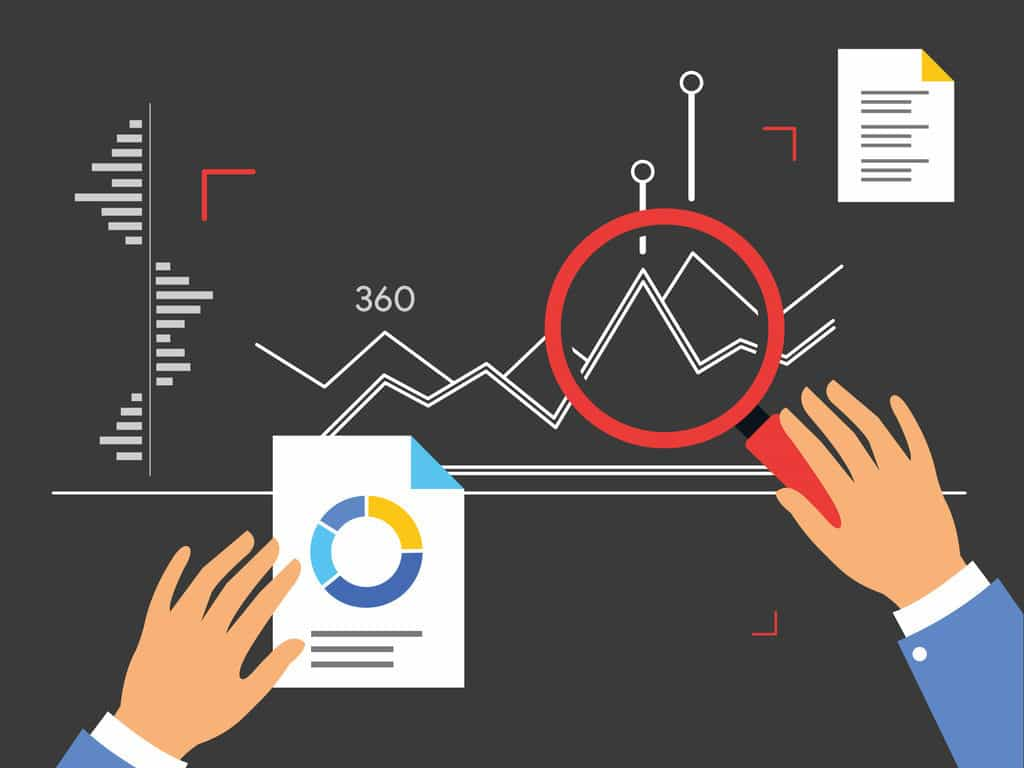

<div class = "alert alert-info">
<h1>Intorduction</h1>
<ui>
In this notebook, we performed sales prediction based on advertising expenditure features such as TV, newspaper, and radio.
<br>
<h2>Performance</h2>
    
We evaluated the performance of our models using the following metrics:

<li>R-squared (R2) score: A measure of how well the model captures the variance in the target variable (sales).</li>
<li>Mean Squared Error (MSE): A measure of the average squared difference between predicted and actual sales values.</li>
<li>Cross-Validation Score: To ensure the model's generalization ability and minimize overfitting.</li>
    
<h2>Models</h2>
We trained various models, including linear regression, Lasso, and Ridge regression. Finally, we tested our models on new data to assess their real-world predictive performance.
    
    
</ui>
</div>

# 📦 Importing Dependencies


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

# 🗂️ Dataset


In [ ]:
df = pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")

In [ ]:
df.sample(5)

In [ ]:
df = df.drop(columns="Unnamed: 0", axis=1)

In [ ]:
df.sample(2)

# 📊 EDA (Exploratory Data Analysis)


In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.describe()

In [ ]:
df.head()

# 📊 Boxplot


In [ ]:

plt.figure(figsize=(12, 8))

columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=df[col_name],palette="pastel")
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()


# 📈 Distplot (Distribution Plot)


In [ ]:

plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=df[col_name],hist=False, label= col_name)
    sns.distplot(x=df["Sales"],hist = False,label= "Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
df.corr()

# 🔥 Heatmap


In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.title("Heatmap for the correlations")
plt.show()

# 📊 Pairplot



In [ ]:
sns.pairplot(data = df,x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg",palette="pastel")
plt.show()

# 📊 Scatterplot


In [ ]:

plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=df[col_name],y=df["Sales"], label= col_name,palette="pastel")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot: {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="TV",y="Sales",style="Radio",size="Newspaper",palette="pastel",legend=False)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship between TV and Sales with Radio Impact and Newspaper")
plt.show()

# 📊 Histplot (Histogram Plot)


In [ ]:
df.hist()
plt.show()

In [ ]:
df.head()

In [ ]:
X = df.drop(columns="Sales",axis=1)

In [ ]:
y=df["Sales"]

# 🏷️ Label Encoder


In [ ]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

le = LabelEncoder()
y= le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 🔢 MinMax Scaler


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 Model Training


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

# 📉 Lineplot


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

for name, model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()    

# 📝 Model Testing 🧪

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})

new_pred_scaled = scaler.transform(new_data)
print("-------------------------------------")
new_pred = lr.predict(new_pred_scaled)
print("Predicted Sales : {}".format(abs(new_pred)))



<div class = "alert alert-success">
<h3>Tested on Following Details</h3> 
<ui>
<li>Enter the TV value:  76.3</li>
<li>Enter the Radio value:  27</li>
<li>Enter the Newspaper value: 16</li>
</ui>
</div>